In [4]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [5]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [6]:
import collect_stats as cs

In [138]:
exp_folder = '/cluster/sj1/bb_opt/experiments/ensemble'
test_filepath = '/cluster/sj1/bb_opt/data/tatsu_pbm/test_files'
filedir = '/cluster/sj1/bb_opt/data/paper_data2'
num_tfs_to_test = 10
batches = [10, 100]
num_acks = 30

In [8]:
with open(test_filepath, 'r') as f:
    filenames = [k.strip() for k in f.readlines()][:num_tfs_to_test]

In [139]:
def sigmoid(x, exp=np.exp):
  return 1.0 / (1.0 + exp(-x))

In [112]:
filenames = [
    'ARX_L343Q_R1_8mers.txt',
    'BCL6_H676Y_R1_8mers.txt',
    'CRX_E80A_R1_8mers.txt',
    'EGR2_D383Y_R1_8mers.txt',
    'ESX1_K193R_R1_8mers.txt',
    'FOXC1_F112S_R1_8mers.txt',
    'GFI1B_A204T_R1_8mers.txt',
    'GFI1_L400F_R1_8mers.txt',
    'HESX1_E149K_R1_8mers.txt',
    'HOXC4_N178S_R1_8mers.txt',
    'HOXD13_I322L_R1_8mers.txt',
    'ISX_R83Q_R1_8mers.txt',
    'KLF11_R402Q_R1_8mers.txt',
    'KLF1_E325K_R1_8mers.txt',
    'MSX2_P148H_R1_8mers.txt',
    'NKX2-5_K183E_R1_8mers.txt',
    'NR1H4_C144R_R1_8mers.txt',
    'NR2E3_G56R_R1_8mers.txt',
    'OVOL2_D228E_R1_8mers.txt',
    'PAX3_G48R_R1_8mers.txt',
    'PAX4_R183C_R1_8mers.txt',
    'PAX6_A79E_R1_8mers.txt',
    'PAX7_P112L_R1_8mers.txt',
    'PBX4_R215Q_R1_8mers.txt',
    'PHOX2B_Q143R_R1_8mers.txt',
    'PITX2_L100Q_R1_8mers.txt',
    'POU3F4_A237G_R1_8mers.txt',
    'POU4F3_K277R_R1_8mers.txt',
    'POU6F2_E639K_R1_8mers.txt',
    'PROP1_R112Q_R1_8mers.txt',
    'SIX6_H141N_R1_8mers.txt',
    'SNAI2_D119E_R1_8mers.txt',
    'VAX2_L139M_R1_8mers.txt',
    'VENTX_E101K_R1_8mers.txt',
    'VSX1_G160D_R1_8mers.txt',
    'WT1_F392L_R1_8mers.txt',
    'ZNF200_H322Y_R1_8mers.txt',
    'ZNF655_E327G_R1_8mers.txt',
]

In [150]:
tf_max = {}
for tf in filenames:
    labels = np.load(filedir + "/" + tf + "/labels.npy")
    labels = np.log(labels)
    tf_max[tf] = float(labels.max())

In [12]:
arrs = {
    'o_none_ucb_c1.0_g0.0_' : [None, 'c1.0_g0.0'],
    'o_none_ucb_c2.0_g0.0_' : [None, 'c2.0_g0.0'],
    'o_none_ucb_c1.0_g0.1_': [None, 'c1.0_g0.1'],
    'o_none_ucb_c1.0_g0.5_' : [None, 'c1.0_g0.5'],
    'o_none_ucb_c1.0_g1.0_': [None, 'c1.0_g1.0'],
    'o_none_ucb_c1.0_g5.0_': [None, 'c1.0_g5.0'],
    'o_none_ucb_c1.0_g10.0_': [None, 'c1.0_g10.0'],
    'o_none_ucb_c1.0_g20.0_': [None, 'c1.0_g20.0'],
    }

In [31]:
arrs = {
    'take_log_none_ucb_c1.0_g0.0_' : [None, 'c1.0_g0.0'],
    'take_log_none_ucb_c2.0_g0.0_' : [None, 'c2.0_g0.0'],
    'take_log_none_ucb_c1.0_g5.0_' : [None, 'c1.0_g5.0'],
    'take_log_none_ucb_c1.0_g10.0_' : [None, 'c1.0_g10.0'],
    'take_log_none_ucb_c1.0_g20.0_' : [None, 'c1.0_g20.0'],
    'take_log_none_ucb_c1.0_g5.0_minin_' : [None, 'c1.0_g5.0_minin'],
    'take_log_none_ucb_c1.0_g10.0_minin_' : [None, 'c1.0_g10.0_minin'],
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_', : [None, 'a_30_c1.0_g0.0_'],
    'take_log_none_ucb_num_acks_30_c1.0_g5.0_', : [None, 'a_30_c1.0_g5.0_'],
    'take_log_none_ucb_num_acks_30_c1.0_g10.0_', : [None, 'a_30_c1.0_g10.0_'],
}
to_read = arrs.keys()

In [101]:
arrs['take_log_none_ucb_num_acks_30_c1.0_g0.0_'] = [None, 'a_30_c1.0_g0.0_']
arrs['take_log_none_ucb_num_acks_30_c1.0_g5.0_'] = [None, 'a_30_c1.0_g5.0_']
arrs['take_log_none_ucb_num_acks_30_c1.0_g10.0_'] = [None, 'a_30_c1.0_g10.0_']

In [104]:
arrs['take_log_none_ucb_num_acks_30_c1.0_maxvar_'] = [None, 'a_30_c1.0_maxvar']

In [115]:
to_read = [
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_', 
    #'take_log_none_ucb_num_acks_30_c1.0_g5.0_', 
    #'take_log_none_ucb_num_acks_30_c1.0_g10.0_',
    #'take_log_none_ucb_num_acks_30_c1.0_maxvar_',
]

In [116]:
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_acks, num_samples=10)

reading take_log_none_ucb_num_acks_30_c1.0_g0.0_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10


In [117]:
to_eval = [
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_',
    'take_log_none_ucb_num_acks_30_c1.0_g5.0_',
    'take_log_none_ucb_num_acks_30_c1.0_g10.0_',
]
to_eval = [
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_',
    'take_log_none_ucb_num_acks_30_c1.0_maxvar_',
]

In [91]:
len( arrs['take_log_none_ucb_num_acks_30_c1.0_g0.0_'][0][0][filename][10])

1

In [154]:
ack_iter = -1
for batch_size in batches:
    print("BATCH SIZE", batch_size)
    for filename in filenames:
        print(filename)
        for experiment in to_eval:
            if len(arrs[experiment][0]) == 0:
                continue
            idx_frac = None
            num_used = 0
            val_nll = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                val_nll += stats[filename][batch_size][0]['logging'][5].min().item()
                if idx_frac is None:
                    idx_frac = stats[filename][batch_size][ack_iter]['idx_frac']
                else:
                    idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['idx_frac']
            if num_used > 0:
                idx_frac = idx_frac/num_used
                idx_frac = idx_frac.numpy()
                print(arrs[experiment][1] + ":", " ".join(("{:6.6f}".format(k) for k in idx_frac)), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")

BATCH SIZE 10
ARX_L343Q_R1_8mers.txt
a_30_c1.0_g0.0_: 0.184451 0.098114 0.064701 0.039307 ;  -0.48 val_nll ; 10 samples
a_30_c1.0_maxvar: 0.191463 0.096776 0.063272 0.038380 ;  -0.61 val_nll ; 10 samples
BCL6_H676Y_R1_8mers.txt
a_30_c1.0_g0.0_: 0.403354 0.161131 0.088629 0.045296 ;  -1.10 val_nll ; 10 samples
a_30_c1.0_maxvar: 0.400610 0.159915 0.088142 0.044733 ;  -1.12 val_nll ; 10 samples
CRX_E80A_R1_8mers.txt
a_30_c1.0_g0.0_: 0.182012 0.124027 0.077106 0.043274 ;  -0.93 val_nll ; 10 samples
a_30_c1.0_maxvar: 0.187805 0.119465 0.074430 0.042058 ;  -1.03 val_nll ; 10 samples
EGR2_D383Y_R1_8mers.txt
a_30_c1.0_g0.0_: 0.153659 0.077007 0.049894 0.031646 ;  -0.24 val_nll ; 10 samples
a_30_c1.0_maxvar: 0.213720 0.094404 0.056704 0.034002 ;  -0.39 val_nll ; 10 samples
ESX1_K193R_R1_8mers.txt
a_30_c1.0_g0.0_: 0.492378 0.165815 0.088142 0.045220 ;  -1.02 val_nll ; 10 samples
a_30_c1.0_maxvar: 0.464634 0.163139 0.087686 0.044931 ;  -1.27 val_nll ; 10 samples
FOXC1_F112S_R1_8mers.txt
a_30_c1.0

In [ ]:
ack_iter = 1
for filename in filenames:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            best_value = 0
            num_used = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                best_value += stats[filename][batch_size][ack_iter]['ack_labels'].max().item()
            if num_used > 0:
                best_value = best_value/num_used
                print(arrs[experiment][1] + ":", best_value, ";", str(num_used), "samples")

GFI1_REF_R1_8mers.txt


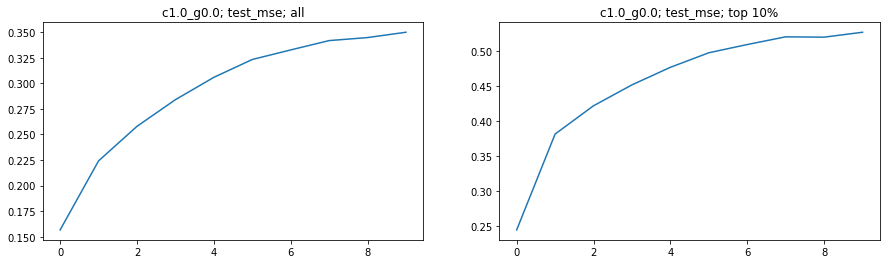

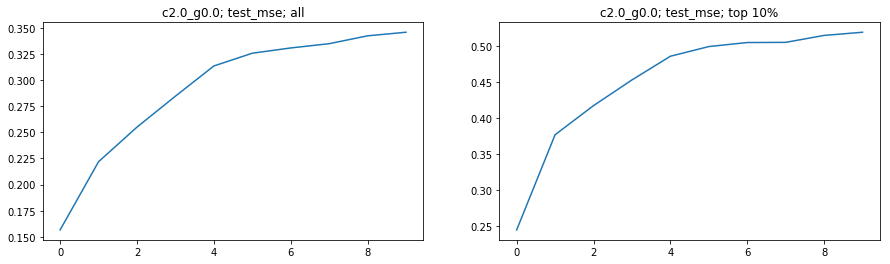

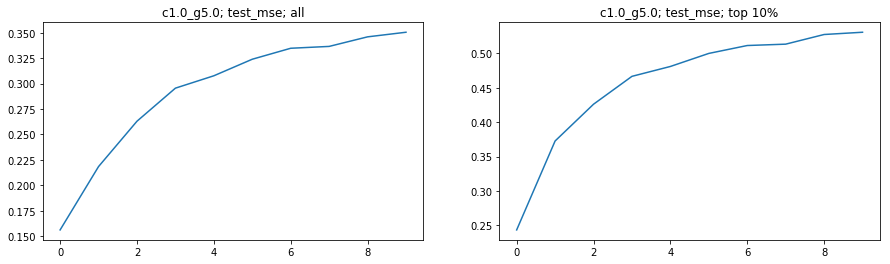

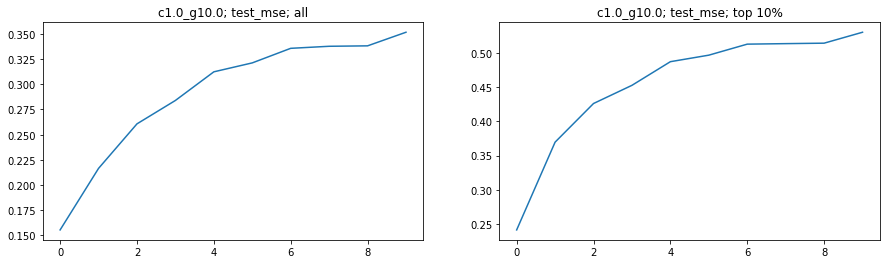

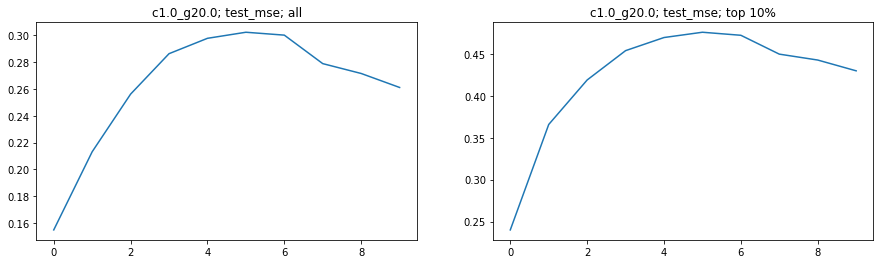

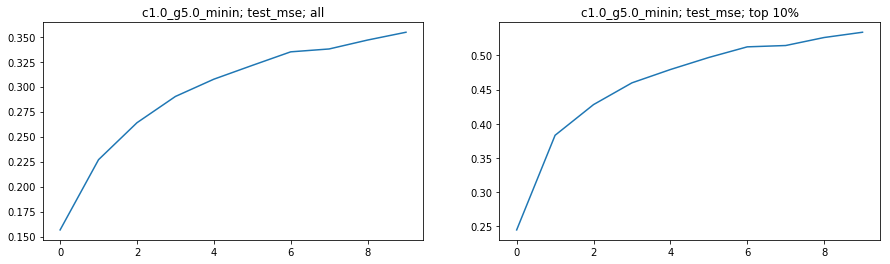

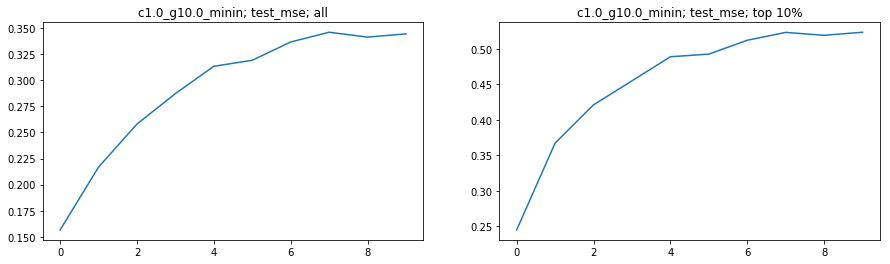

In [34]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

avg = True

for prop in test_properties[1:2]:
    for filename in filenames[0:1]:
        print(filename)
        for batch_size in batches:
            for experiment in arrs:
                plt.figure(figsize=(15, 4))
                plt.subplot(121)
                prop_list = np.array([0.]*num_acks)
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        prop_list += np.array([stats[filename][batch_size][i][prop][0].item() for i in range(num_acks)])
                    else:
                        prop_list = [stats[filename][batch_size][i][prop][0].item() for i in range(num_acks)]
                    if not avg:
                        plt.plot(prop_list)
                if avg:
                    plt.plot(prop_list/num_used)
                plt.title(arrs[experiment][1] + "; " + prop + "; all")
                plt.subplot(122)
                prop_list = np.array([0.]*num_acks)
                num_used = 0
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) < num_acks:
                        continue
                    num_used += 1
                    if avg:
                        prop_list += np.array([stats[filename][batch_size][i][prop][1].item() for i in range(num_acks)])
                    else:
                        prop_list = [stats[filename][batch_size][i][prop][1].item() for i in range(num_acks)]
                    if not avg:
                        plt.plot(prop_list)
                if avg:
                    plt.plot(prop_list/num_used)
                plt.title(arrs[experiment][1] + "; " + prop + "; top 10%")

In [ ]:
ack_iter = 0
for filename in filenames[2:3]:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                prop_list = stats[filename][batch_size][ack_iter]['logging'][-1].numpy()
                plt.plot(prop_list)
                plt.title(arrs[experiment][1] + "; " + str(ack_iter))

GFI1_REF_R1_8mers.txt


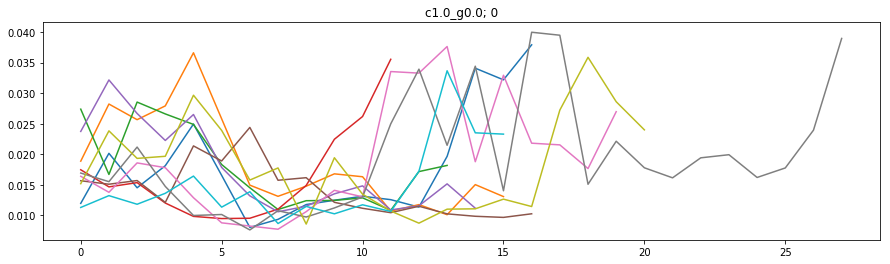

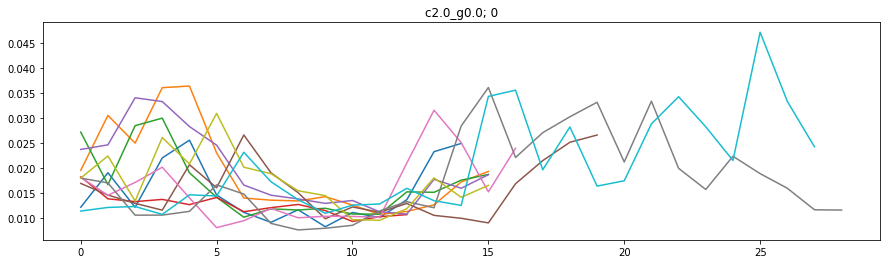

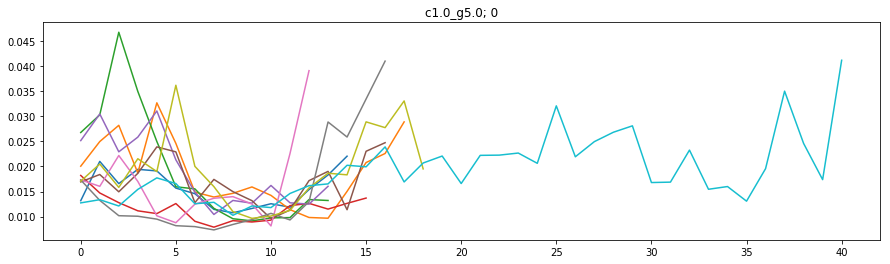

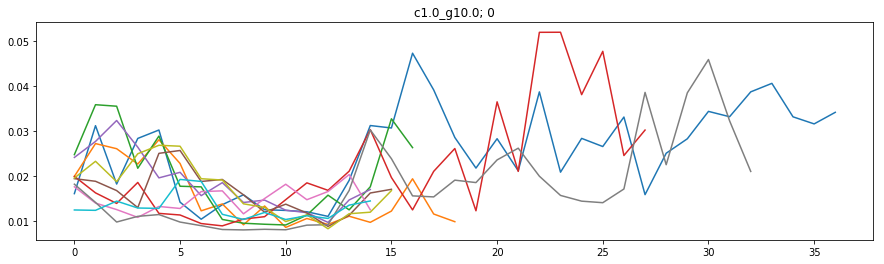

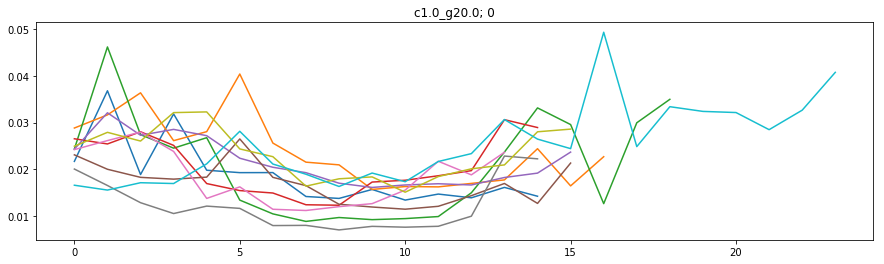

In [19]:
ack_iter = 0
for filename in filenames[0:1]:
    print(filename)
    for batch_size in batches:
        for experiment in arrs:
            plt.figure(figsize=(15, 4))
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                prop_list = stats[filename][batch_size][ack_iter]['logging'][3].numpy()
                plt.plot(prop_list)
                plt.title(arrs[experiment][1] + "; " + str(ack_iter))

In [174]:
test_properties = [
    'test_log_prob',
    'test_mse',
    'test_kt_corr',
    'test_std_list',
    'test_mse_std_corr'
]

ack_iter = -1
for filename in filenames:
    print(filename)
    for batch_size in [10]:
        for experiment in to_eval:
            m = None
            num_used = 0
            for stats in arrs[experiment][0]:
                #for i in range(num_acks):
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                num_used += 1
                #m += stats[filename][batch_size][ack_iter]['test_std_list'][0].item()
                m2 = np.array([
                    np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][0].item(),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][1].item(),
                    #stats[filename][batch_size][ack_iter]['test_std_list'][2].item()
                ])
                if m is None:
                    m = m2
                else:
                    m += m2
            if num_used > 0:
                print(arrs[experiment][1], ":", m/num_used, ";", num_used, "samples")

ARX_L343Q_R1_8mers.txt
a_30_c1.0_g0.0_ : [0.9713051] ; 10 samples
a_30_c1.0_maxvar : [0.97133034] ; 10 samples
BCL6_H676Y_R1_8mers.txt
a_30_c1.0_g0.0_ : [0.988155] ; 10 samples
a_30_c1.0_maxvar : [0.9940775] ; 10 samples
CRX_E80A_R1_8mers.txt
a_30_c1.0_g0.0_ : [0.8966109] ; 10 samples
a_30_c1.0_maxvar : [0.925805] ; 10 samples
EGR2_D383Y_R1_8mers.txt
a_30_c1.0_g0.0_ : [0.69891465] ; 10 samples
a_30_c1.0_maxvar : [0.9017851] ; 10 samples
ESX1_K193R_R1_8mers.txt
a_30_c1.0_g0.0_ : [0.9555715] ; 10 samples
a_30_c1.0_maxvar : [0.91114295] ; 10 samples
FOXC1_F112S_R1_8mers.txt
a_30_c1.0_g0.0_ : [0.9992908] ; 10 samples
a_30_c1.0_maxvar : [0.9979911] ; 10 samples
GFI1B_A204T_R1_8mers.txt
a_30_c1.0_g0.0_ : [0.8589632] ; 10 samples
a_30_c1.0_maxvar : [0.8908394] ; 10 samples
GFI1_L400F_R1_8mers.txt
a_30_c1.0_g0.0_ : [0.78202766] ; 10 samples
a_30_c1.0_maxvar : [0.82458866] ; 10 samples
HESX1_E149K_R1_8mers.txt
a_30_c1.0_g0.0_ : [0.7967523] ; 10 samples
a_30_c1.0_maxvar : [0.8761026] ; 10 sample

In [43]:
num_labels = 32897

In [79]:
to_eval = [
    'take_log_none_ucb_c1.0_g0.0_',
    #'take_log_none_ucb_c2.0_g0.0_',
    'take_log_none_ucb_c1.0_g5.0_',
    'take_log_none_ucb_c1.0_g10.0_',
    'take_log_none_ucb_c1.0_g20.0_',
]

to_eval = [
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_',
    'take_log_none_ucb_num_acks_30_c1.0_g5.0_',
    'take_log_none_ucb_num_acks_30_c1.0_g10.0_',
]

In [81]:
num_acks = 30

In [165]:
to_eval = {
    'take_log_none_ucb_num_acks_30_c1.0_g0.0_': 'Normal',
    'take_log_none_ucb_num_acks_30_c1.0_maxvar_' : 'MOD'
}

/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


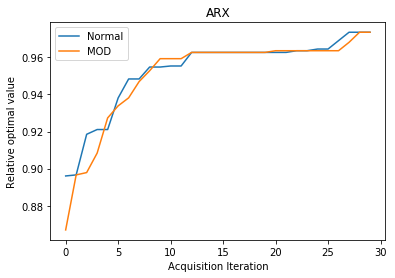

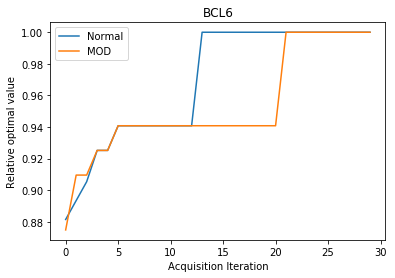

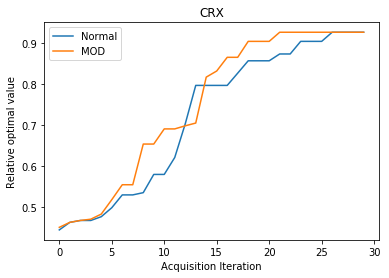

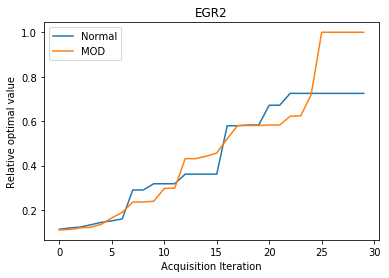

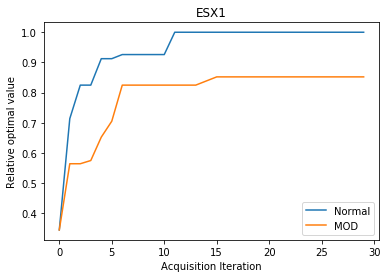

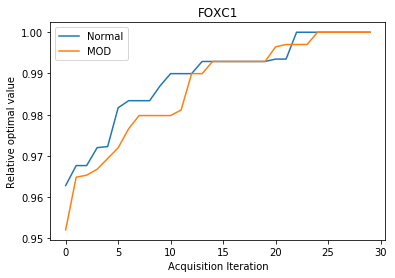

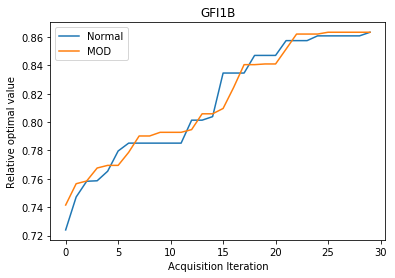

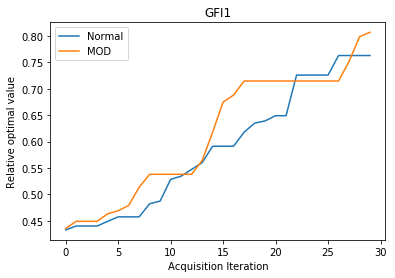

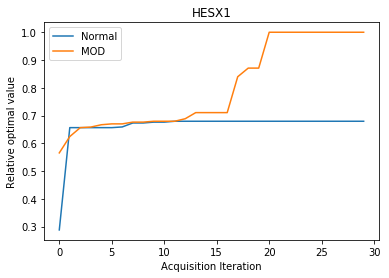

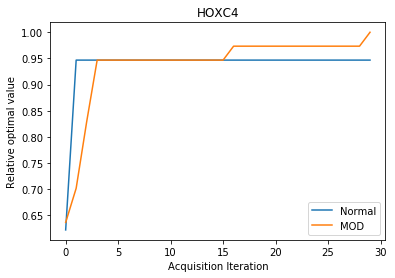

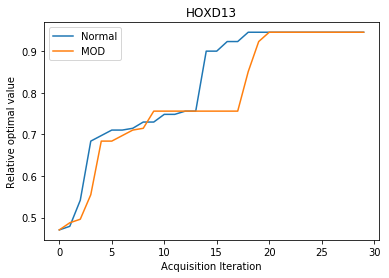

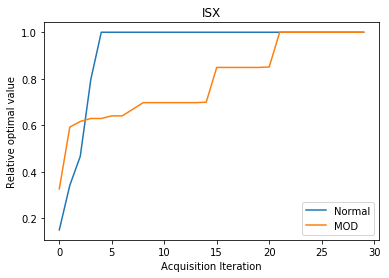

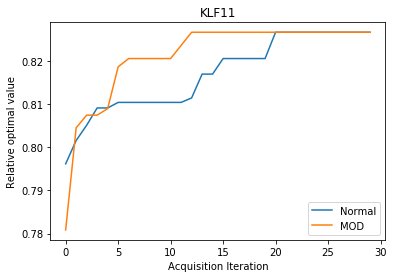

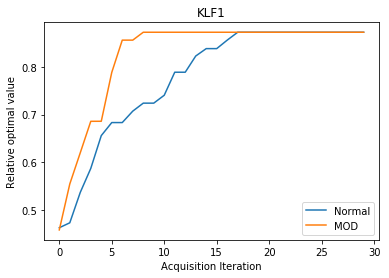

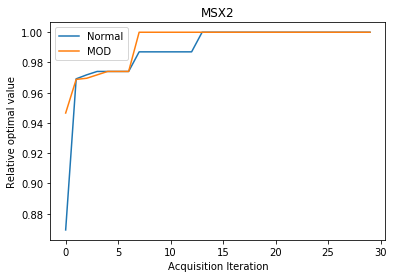

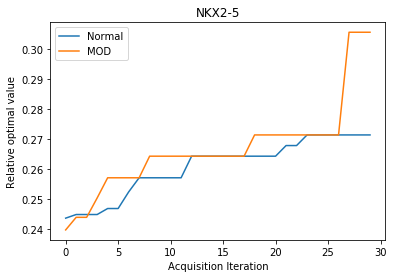

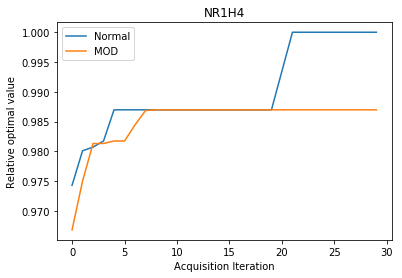

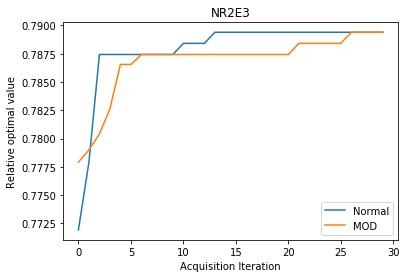

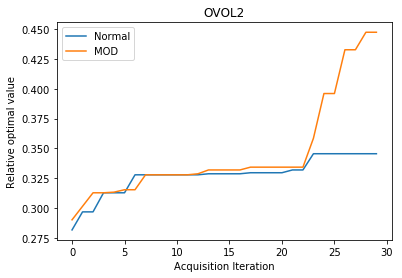

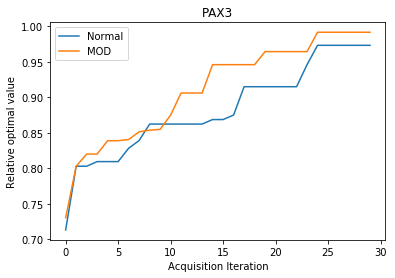

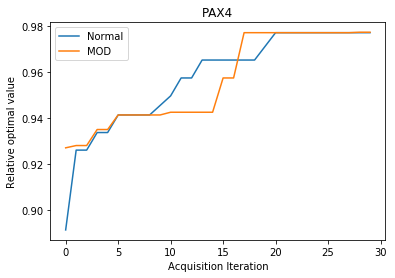

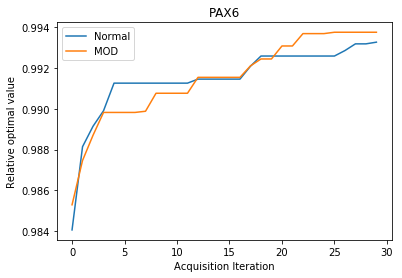

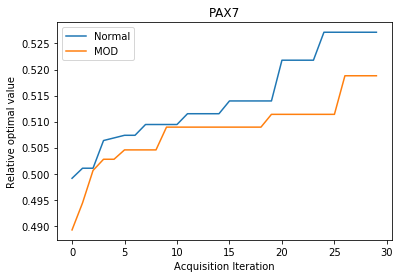

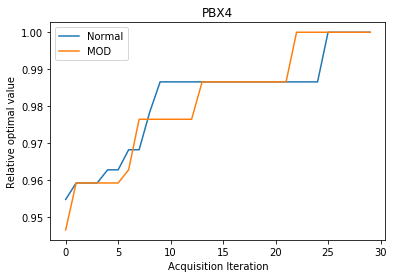

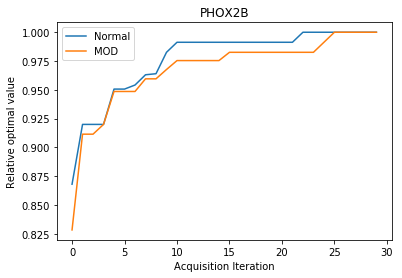

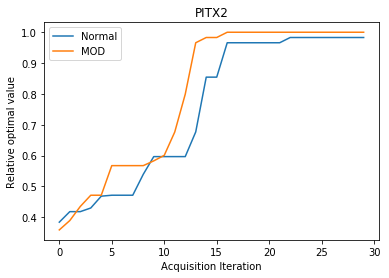

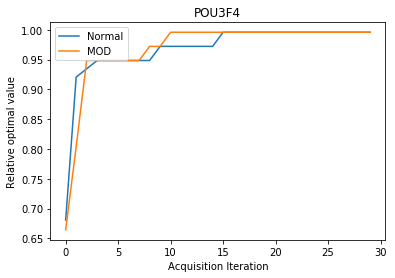

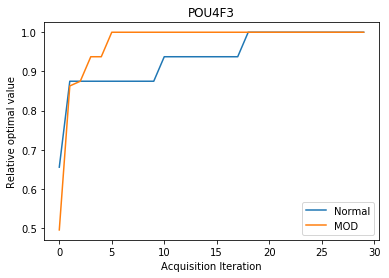

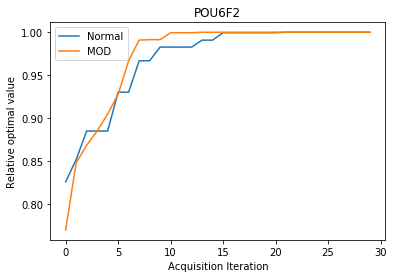

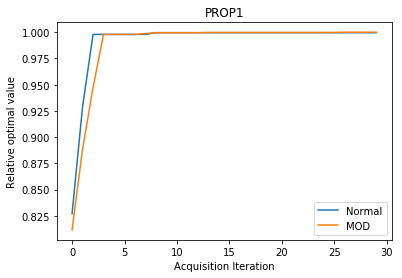

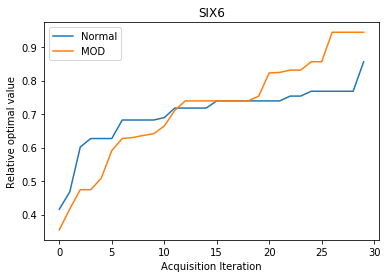

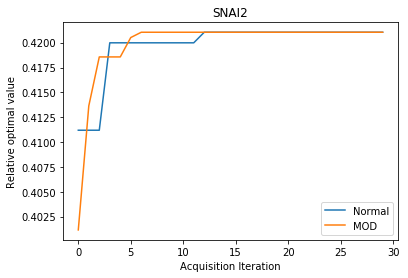

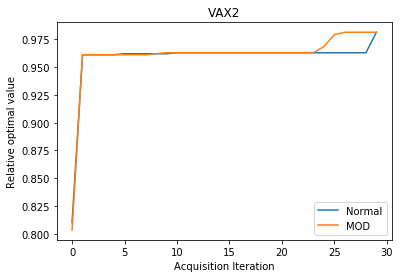

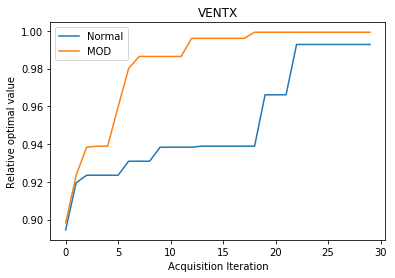

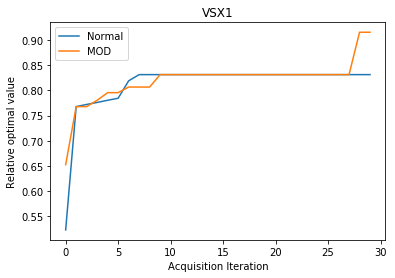

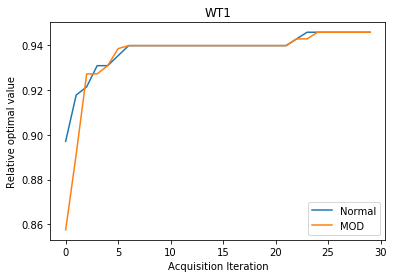

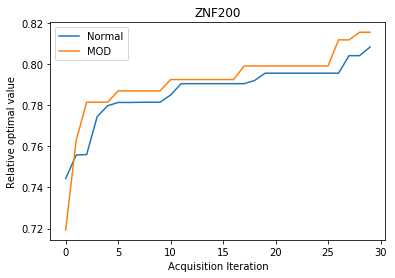

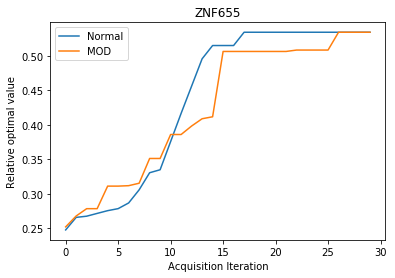

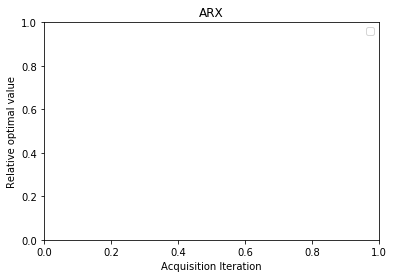

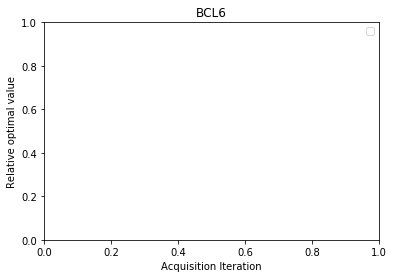

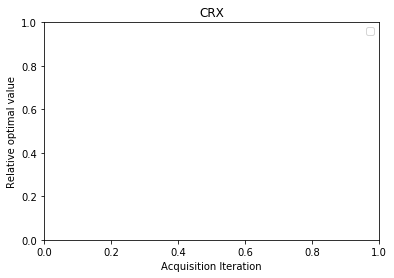

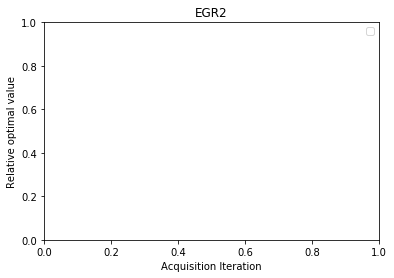

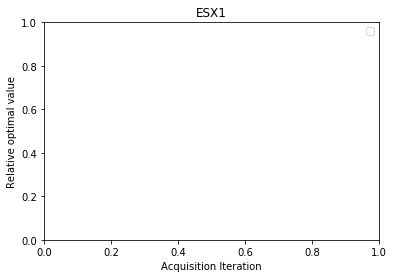

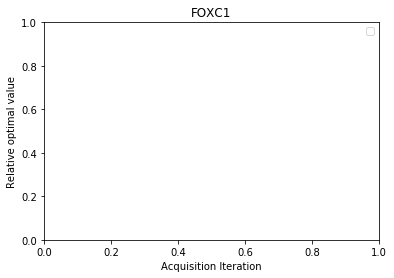

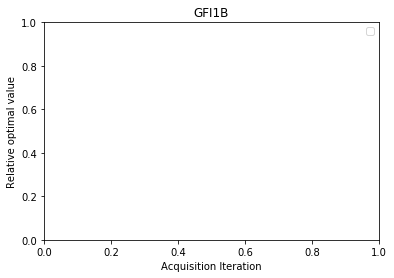

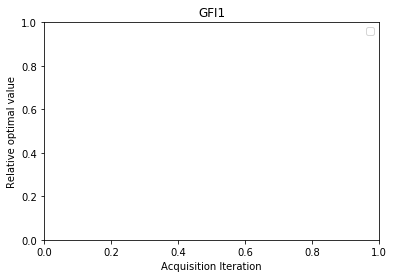

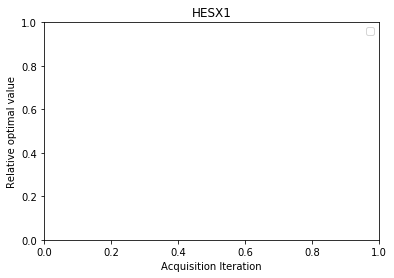

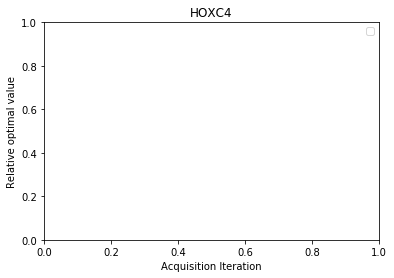

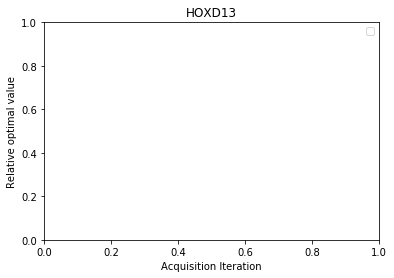

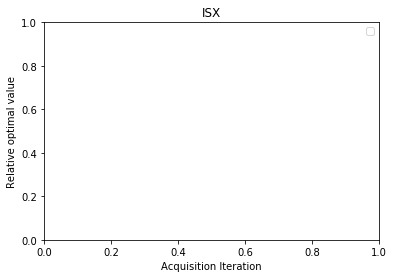

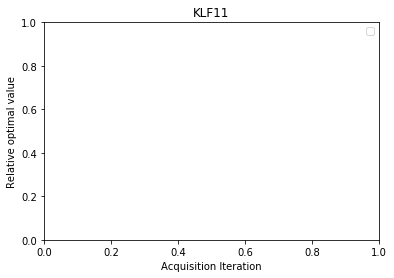

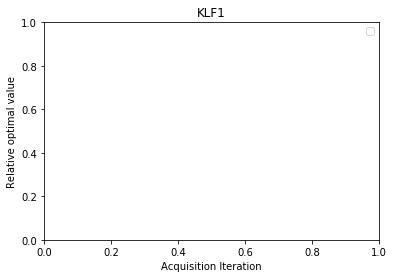

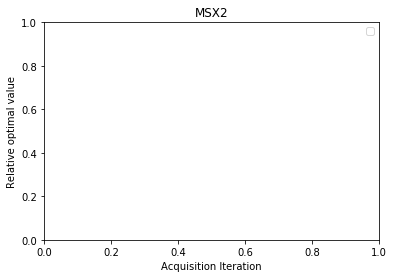

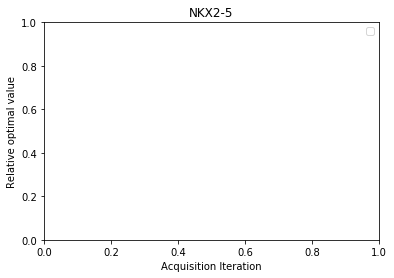

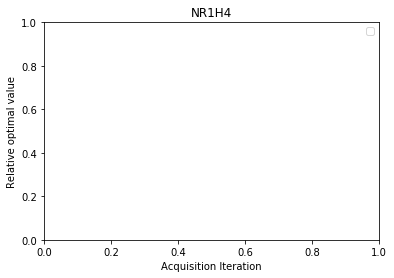

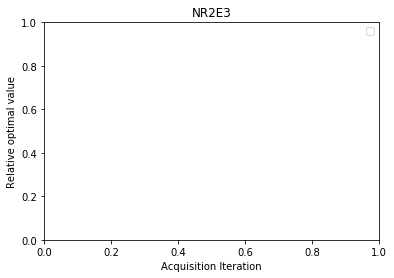

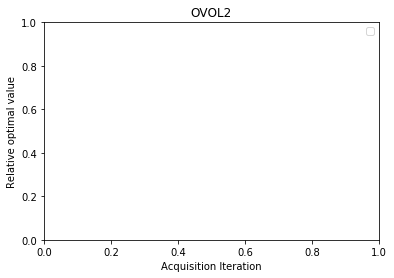

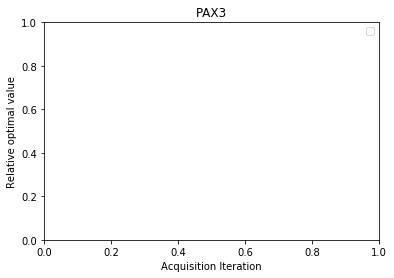

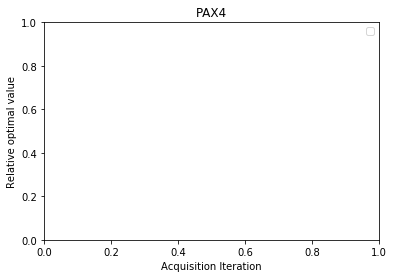

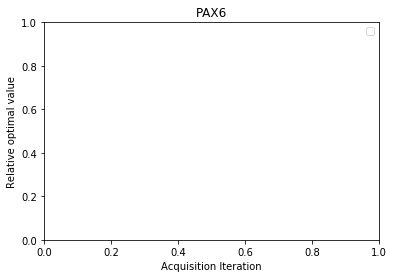

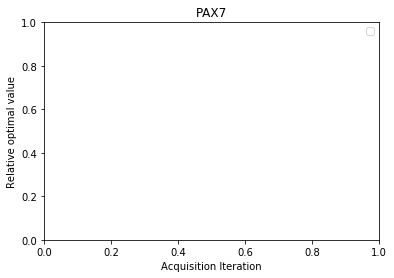

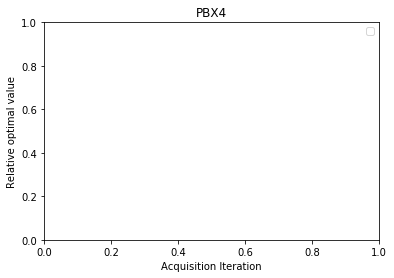

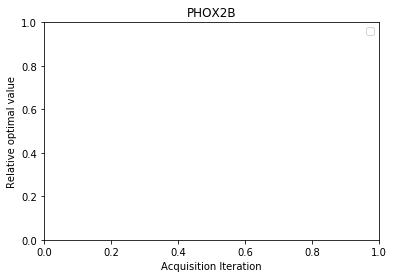

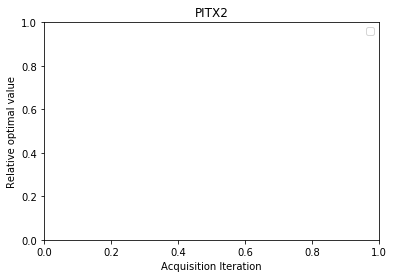

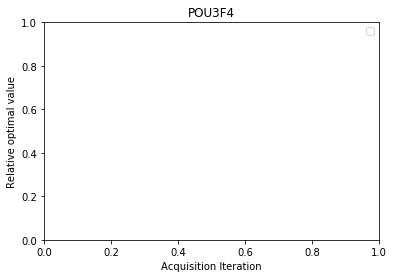

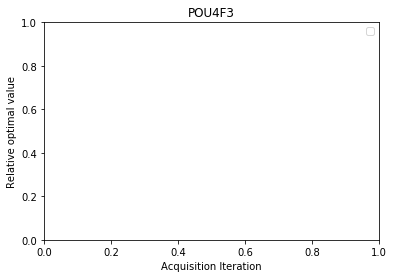

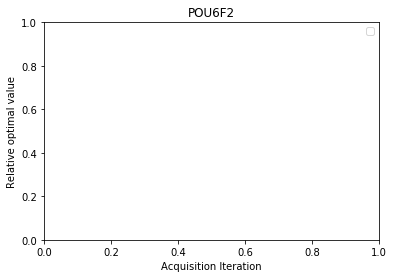

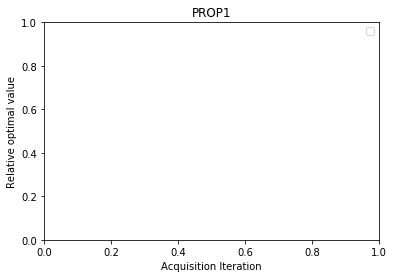

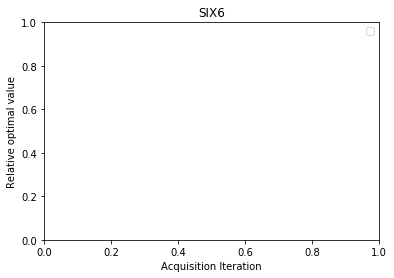

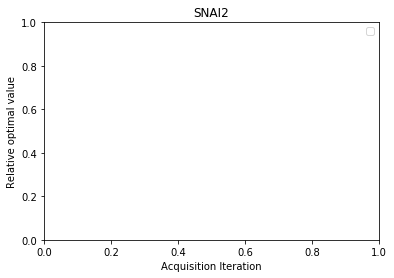

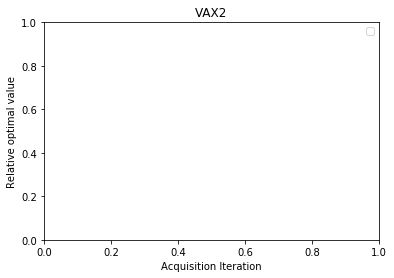

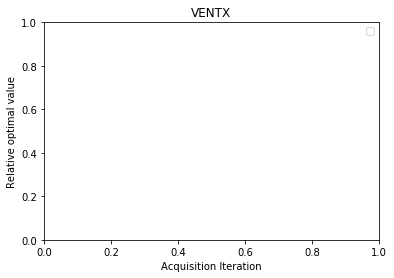

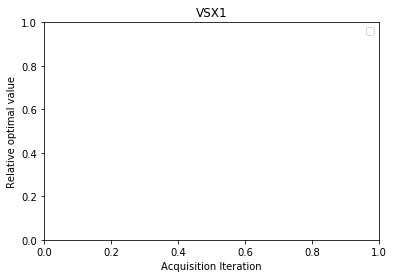

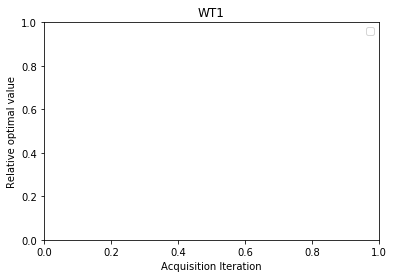

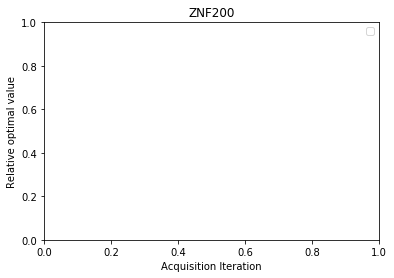

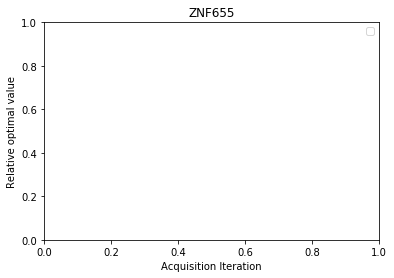

In [179]:
avg = True

for batch_size in batches:
    for filename in filenames:
        if avg:
            plt.figure(figsize=(6, 4))
            legend = []
        for experiment in to_eval:
            if not avg:
                plt.figure(figsize=(15, 4))
            prop_list = []
            num_used = 0
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                if len(stats[filename][batch_size]) < num_acks:
                    continue
                num_used += 1
                if avg:
                    prop_list += [np.array([np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]) for ack_iter in range(num_acks)])]
                    #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['idx_frac'][0]) for ack_iter in range(num_acks)])]
                else:
                    prop_list = [(stats[filename][batch_size][ack_iter]['ack_labels'].max()) for ack_iter in range(num_acks)]
                if not avg:
                    plt.plot(prop_list)
            if avg and num_used > 0:
                prop_list = np.stack(prop_list, axis=0)
                plt.plot(np.median(prop_list, axis=0))
                legend += [to_eval[experiment]]
            elif not avg:
                plt.title(arrs[experiment][1] + "; " + str(batch_size) + "; all")
        if avg:
            plt.legend(legend)
            plt.xlabel('Acquisition Iteration')
            plt.ylabel('Relative optimal value')
            #plt.title(filename + "; " + str(batch_size) + "; all")
            plt.title(filename.split("_")[0])

Text(0, 0.5, 'Relative optimal value')

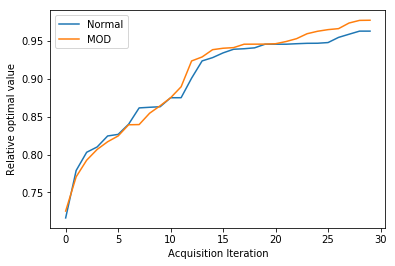

In [178]:
avg = True

plt.figure(figsize=(6, 4))
legend = []
for experiment in to_eval:
    prop_list = []
    for batch_size in [10]:
        for filename in filenames:
            for stats in arrs[experiment][0]:
                if filename not in stats:
                    continue
                if batch_size not in stats[filename]:
                    continue
                if len(stats[filename][batch_size]) < num_acks:
                    continue
                prop_list += [np.array([np.exp(stats[filename][batch_size][ack_iter]['ack_labels'].max()-tf_max[filename]) for ack_iter in range(num_acks)])]
                #prop_list += [np.array([(stats[filename][batch_size][ack_iter]['idx_frac'][0]) for ack_iter in range(num_acks)])]
    prop_list = np.stack(prop_list, axis=0)
    plt.plot(np.median(prop_list, axis=0))
    #legend += [arrs[experiment][1]]
    legend += [to_eval[experiment]]
plt.legend(legend)
plt.xlabel('Acquisition Iteration')
plt.ylabel('Relative optimal value')